<a href="https://colab.research.google.com/github/Ty700/STAT_650/blob/main/Tyler_Scotti_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<figure>
  <IMG SRC="logo-statistics-horizontal-maroon-box-black-1.png" WIDTH=200 ALIGN="right">
</figure>
    
# STAT650: HW 2
*Developed by Yoonsung Jung*

### Task 1:

The goal is to create a single, comprehensive DataFrame that links sales to both products and customers.

In [1]:
# Initial Data for Task 1
import pandas as pd

sales_data = {
    'SaleID': [101, 102, 103, 104, 105, 106, 107, 108],
    'ProductID': [1, 2, 1, 3, 2, 3, 1, 4],
    'CustomerID': [1, 1, 2, 3, 2, 1, 3, 5],
    'Quantity': [2, 1, 5, 1, 3, 2, 1, 1]
}
sales_df = pd.DataFrame(sales_data)

products_data = {
    'ProductID': [1, 2, 3, 4],
    'ProductName': ['Laptop', 'Mouse', 'Keyboard', 'Monitor'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics'],
    'Price': [1200, 25, 75, 300]
}
products_df = pd.DataFrame(products_data)

customers_data = {
    'CustomerID': [1, 2, 3, 4],
    'CustomerName': ['Alice', 'Bob', 'Charlie', 'Daniel'],
    'City': ['New York', 'San Francisco', 'New York', 'Chicago']
}
customers_df = pd.DataFrame(customers_data)

**Directions** with previous datasets,

1. Start with the `sales_data`. Perform an inner merge with `products_data` using `ProductID` to add product name, category, and price to the sales data.

In [7]:
data_and_id = pd.merge(sales_df, products_df, on="ProductID", how="inner")

   SaleID  ProductID  CustomerID  Quantity ProductName     Category  Price
0     101          1           1         2      Laptop  Electronics   1200
1     102          2           1         1       Mouse  Electronics     25
2     103          1           2         5      Laptop  Electronics   1200
3     104          3           3         1    Keyboard  Electronics     75
4     105          2           2         3       Mouse  Electronics     25
5     106          3           1         2    Keyboard  Electronics     75
6     107          1           3         1      Laptop  Electronics   1200
7     108          4           5         1     Monitor  Electronics    300


2. Take the result from the previous step and perform a left merge with `customers_data` using `CustomerID` to add customer names and cities.

In [8]:
data_and_id = pd.merge(data_and_id, customers_df, on="CustomerID", how="left")

3. Display the first 5 rows of the final, fully enriched DataFrame. This master DataFrame will be used in the following tasks.

In [9]:
data_and_id.head(5)

,SaleID,ProductID,CustomerID,Quantity,ProductName,Category,Price,CustomerName,City
0,101,1,1,2,Laptop,Electronics,1200,Alice,New York
1,102,2,1,1,Mouse,Electronics,25,Alice,New York
2,103,1,2,5,Laptop,Electronics,1200,Bob,San Francisco
3,104,3,3,1,Keyboard,Electronics,75,Charlie,New York
4,105,2,2,3,Mouse,Electronics,25,Bob,San Francisco


### Task 2:

This task builds on filtering and creating new columns.

You'll calculate a new metric and then use multiple conditions to find specific transactions.

**Directions:**

1. Using the final merged DataFrame from Task 1, create a new column named `Revenue`. This should be calculated as the product of the `Quantity` and `Price` columns.

In [13]:
data_and_id.loc[:, "Revenue"] = data_and_id["Quantity"] * data_and_id["Price"]

2. Filter the DataFrame to find all sales that meet **both** of the following criteria:

    - The sale was made to a customer in '**New York**'.

    - The `Revenue` from the sale was **greater than $100**.

In [14]:
data_and_id[(data_and_id["City"] == "New York") & (data_and_id["Revenue"] > 100)]

,SaleID,ProductID,CustomerID,Quantity,ProductName,Category,Price,CustomerName,City,Revenue
0,101,1,1,2,Laptop,Electronics,1200,Alice,New York,2400
5,106,3,1,2,Keyboard,Electronics,75,Alice,New York,150
6,107,1,3,1,Laptop,Electronics,1200,Charlie,New York,1200


3. Display the resulting filtered DataFrame.

In [15]:
print(data_and_id)

   SaleID  ProductID  CustomerID  Quantity ProductName     Category  Price  \
0     101          1           1         2      Laptop  Electronics   1200   
1     102          2           1         1       Mouse  Electronics     25   
2     103          1           2         5      Laptop  Electronics   1200   
3     104          3           3         1    Keyboard  Electronics     75   
4     105          2           2         3       Mouse  Electronics     25   
5     106          3           1         2    Keyboard  Electronics     75   
6     107          1           3         1      Laptop  Electronics   1200   
7     108          4           5         1     Monitor  Electronics    300   

  CustomerName           City  Revenue  
0        Alice       New York     2400  
1        Alice       New York       25  
2          Bob  San Francisco     6000  
3      Charlie       New York       75  
4          Bob  San Francisco       75  
5        Alice       New York      150  
6      Cha

### Task 3:

This task is a more advanced version of the grouping and aggregation from Practice 2, requiring you to calculate multiple summary statistics at once.

**Directions:**

1. Using the merged DataFrame with the `Revenue` column, group the data by `Category` and `City`.

    For each group, calculate the following aggregate values:

    - **TotalRevenue**: The sum of `Revenue`.

    - **TotalUnitsSold**: The sum of `Quantity`.

    - **NumberOfSales**: The count of unique sales.

In [16]:
grouped_data = data_and_id.groupby(['Category', 'City']).agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalUnitsSold=('Quantity', 'sum'),
    NumberOfSales=('SaleID', 'count')
).reset_index()

2. Display the resulting aggregated data. This will show you which product categories are most popular in which cities.

In [17]:
print(grouped_data)

      Category           City  TotalRevenue  TotalUnitsSold  NumberOfSales
0  Electronics       New York          3850               7              5
1  Electronics  San Francisco          6075               8              2


### Task 4:

This task combines concatenation and visualization. You'll simulate receiving new data, add it to your existing data, and then create a summary visualization.

**Directions:**

1. A new set of sales data has arrived in `new_sales_data`. Concatenate this new DataFrame with your original `sales_data` to create a `full_sales_data`. Remember to reset the index.

In [24]:
# Initial Data for Task 4
new_sales_data = {
    'SaleID': [109, 110, 111],
    'ProductID': [2, 4, 1],
    'CustomerID': [4, 1, 2],
    'Quantity': [2, 1, 1]
}
new_sales_df = pd.DataFrame(new_sales_data)

# Add your code
full_sales_data = pd.concat([sales_df, new_sales_df], ignore_index=True)

2. Merge the `full_sales_data` with the `products_data` to get product details for all sales.

In [25]:
full_sales_with_products = full_sales_data.merge(products_df, on='ProductID', how='inner')

3. Calculate the `Revenue` for this new combined dataset.

In [26]:
full_sales_with_products['Revenue'] = full_sales_with_products['Quantity'] * full_sales_with_products['Price']

4. Create a **bar chart** that shows the total revenue generated by each `ProductName`.

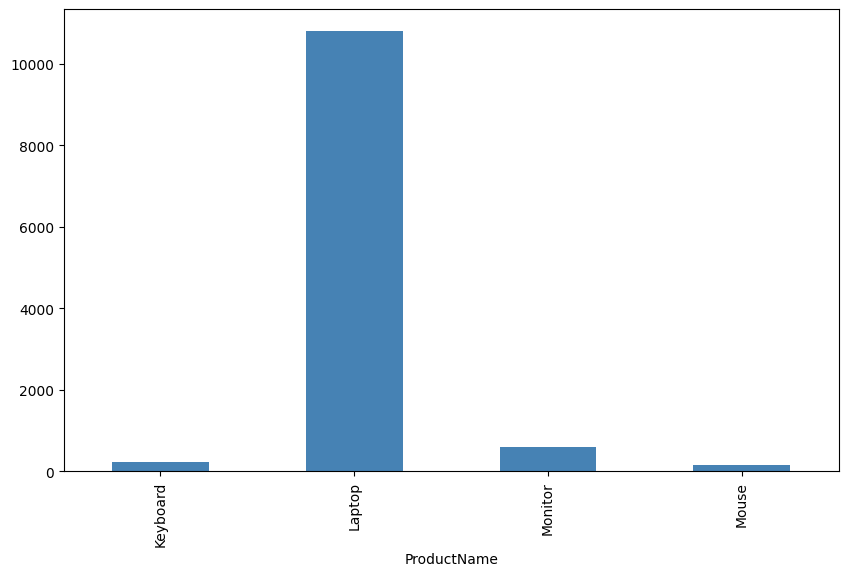

In [32]:
import matplotlib.pyplot as plt

product_revenue = full_sales_with_products.groupby('ProductName')['Revenue'].sum()

plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='steelblue')
plt.show()

5. Customize your plot with a title, axis labels, and rotate the x-axis labels for better readability.

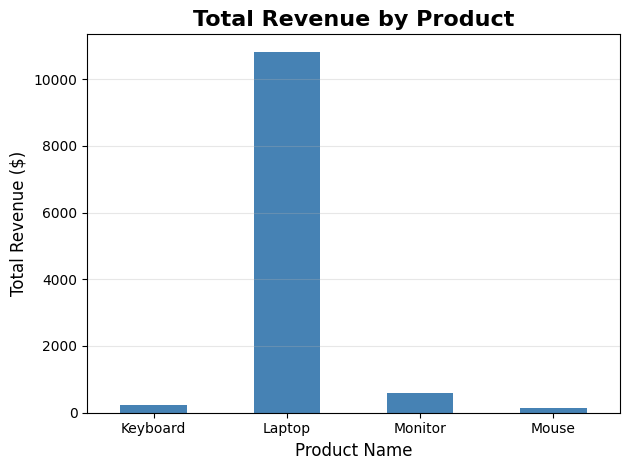

In [36]:
product_revenue.plot(kind='bar', color='steelblue')
plt.title('Total Revenue by Product', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()